#Proyek Akhir Belajar Analisis Data dengan Python

- Nama: Rizki Dinata
- Username Dicoding: rizkidinata
- E-mail:rizkidinata1611@gmail.com

##Menentukan pertanyaan Bisnis

1. Bagaimana tren penyewaan  sepanjang tahun ?
2. Bagaimana pola penyewaan sepeda berdasarkan musim dan bulan agar dapat menyediakan sepeda secara efektif ?
3. Apakah ada pengaruh pola cuaca terhadap penyewaan sepeda ?
4. Apakah hari kerja dan hari libur berpengaruh terhadap penyewaan sepeda ?
5. Bagaimana pola penyewaan sepeda berdasarkan jam ?

In [1]:
!wget https://raw.githubusercontent.com/dinata16/Analisi-Data-Python/main/datasets/Bike-sharing-datasets.zip

--2023-12-06 11:21:54--  https://raw.githubusercontent.com/dinata16/Analisi-Data-Python/main/datasets/Bike-sharing-datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275505 (269K) [application/zip]
Saving to: ‘Bike-sharing-datasets.zip’

Bike-sharing-datase 100%[===================>] 269.05K  --.-KB/s    in 0.03s   

2023-12-06 11:21:55 (8.02 MB/s) - ‘Bike-sharing-datasets.zip’ saved [275505/275505]



In [2]:
!unzip /content/Bike-sharing-datasets.zip

Archive:  /content/Bike-sharing-datasets.zip
  inflating: day.csv                 
  inflating: hour.csv                
  inflating: Readme.txt              


##Install library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

##Data Wrangling

1. Gathering Data

Load Data

In [4]:
df_day = pd.read_csv('/content/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour = pd.read_csv('/content/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Assesing Data

melakukan cek atau pemeriksaan sebelum menganalisis data. Pada tahap ini akan mengecek jumlah baris dan kolom, tipe data, missing value, dan data duplikat

Data Day

In [6]:
#Cek jumlah baris
jml_baris,jml_kolom = df_day.shape
print('Jumlah Baris: {}'.format(jml_baris))
print('Jumlah kolom: {}'.format(jml_kolom))

Jumlah Baris: 731
Jumlah kolom: 16


In [7]:
#Cek tipe data
tp_data= df_day.dtypes
print('Tipe data Day setiap kolom: \n{}'.format(tp_data))

Tipe data Day setiap kolom: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
#Cek Missing Value
ms_values = df_day.isnull().sum()
print('Jumlah Missing Value data Day: \n{}'.format(ms_values))

Jumlah Missing Value data Day: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
#Cek Duplicate
print('Jumlah Duplikat data Day: {}'.format(df_day.duplicated().sum()))

Jumlah Duplikat data Day: 0


In [10]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [11]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [12]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data Hour

In [13]:
#Cek jumlah baris
jml_baris,jml_kolom = df_hour.shape
print('Jumlah Baris: {}'.format(jml_baris))
print('Jumlah kolom: {}'.format(jml_kolom))

Jumlah Baris: 17379
Jumlah kolom: 17


In [14]:
#Cek tipe data
tp_data= df_hour.dtypes
print('Tipe data Day setiap kolom: \n{}'.format(tp_data))

Tipe data Day setiap kolom: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [15]:
#Cek Missing Value
ms_values = df_hour.isnull().sum()
print('Jumlah Missing Value data Day: \n{}'.format(ms_values))

Jumlah Missing Value data Day: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
#Cek Duplicate
print('Jumlah Duplikat data Day: {}'.format(df_hour.duplicated().sum()))

Jumlah Duplikat data Day: 0


In [17]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [18]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [19]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Exploratory Data Analysis

1. Data Day

In [20]:
df_day.groupby("season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
       nunique   max   min         mean
season                                 
1          181  7836   431  2604.132597
2          184  8362   795  4992.331522
3          188  8714  1115  5644.303191
4          178  8555    22  4728.162921

In [21]:
df_day.groupby("mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
     nunique   max   min         mean
mnth                                 
1         62  4521   431  2176.338710
2         57  5062  1005  2655.298246
3         62  8362   605  3692.258065
4         60  7460   795  4484.900000
5         62  8294  2633  5349.774194
6         60  8120  3767  5772.366667
7         62  8173  3285  5563.677419
8         62  7865  1115  5664.419355
9         60  8714  1842  5766.516667
10        62  8156    22  5199.225806
11        60  6852  1495  4247.183333
12        62  6606   441  3403.806452

In [22]:
df_day.groupby("weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant   cnt                   
        nunique   max   min         mean
weekday                                 
0           105  8227   605  4228.828571
1           105  7525    22  4338.123810
2           104  7767   683  4510.663462
3           104  8173   441  4548.538462
4           104  7804   431  4667.259615
5           104  8362  1167  4690.288462
6           105  8714   627  4550.542857

2. Data Hour

In [23]:
df_hour.groupby("hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"]
})

instant  cnt                
   nunique  max min        mean
hr                             
0      726  283   2   53.898072
1      724  168   1   33.375691
2      715  132   1   22.869930
3      697   79   1   11.727403
4      697   28   1    6.352941
5      717   66   1   19.889819
6      725  213   1   76.044138
7      727  596   1  212.064649
8      727  839   5  359.011004
9      727  426  14  219.309491
10     727  539   8  173.668501
11     727  663  10  208.143054
12     728  776   3  253.315934
13     729  760  11  253.661180
14     729  750  12  240.949246
15     729  750   7  251.233196
16     730  783  11  311.983562
17     730  976  15  461.452055
18     728  977  23  425.510989
19     728  743  11  311.523352
20     728  567  11  226.030220
21     728  584   6  172.314560
22     728  502   9  131.335165
23     728  256   2   87.831044

karena data dteday merupakan string maka diubah dulu formatnya menjadi datetime

In [24]:
# Ubah menjadi format datetimr
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Gabungkan data
df_maindt = pd.merge(
    left=df_day,
    right=df_hour,
    how="inner",
    on="dteday",
    suffixes=('_daily','_hourly')
)

df_maindt.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Data Visualization

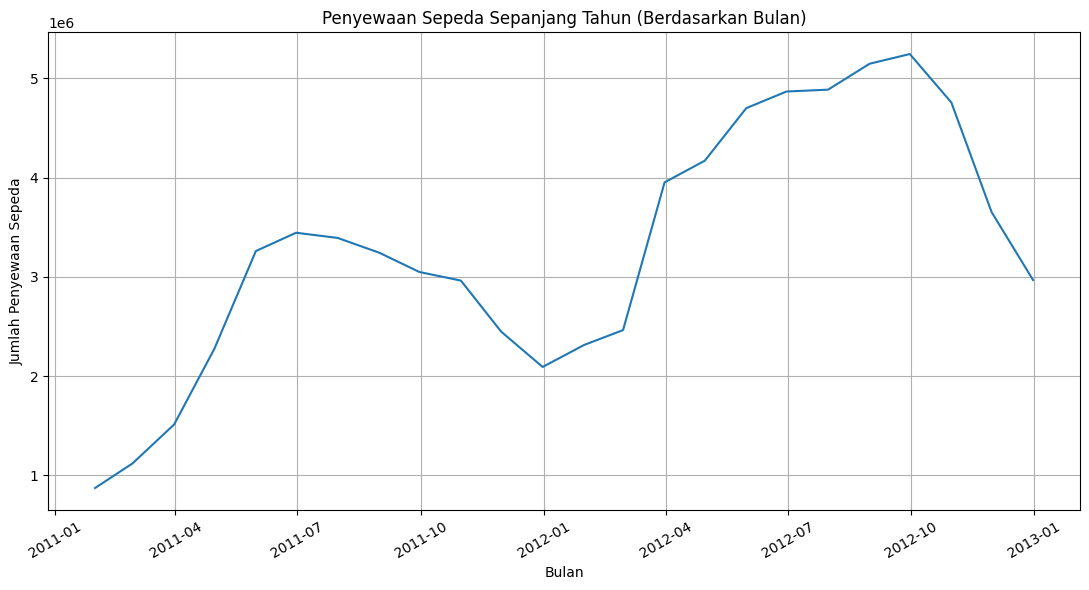

In [25]:
# Gabung data Day dan data Hour berdasarkan bulan
df_monthly = df_maindt.resample('M', on='dteday').sum()

# Plot the data
plt.figure(figsize=(11,6))
plt.plot(df_monthly.index, df_monthly['cnt_daily'])

plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Sepanjang Tahun (Berdasarkan Bulan)')

plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


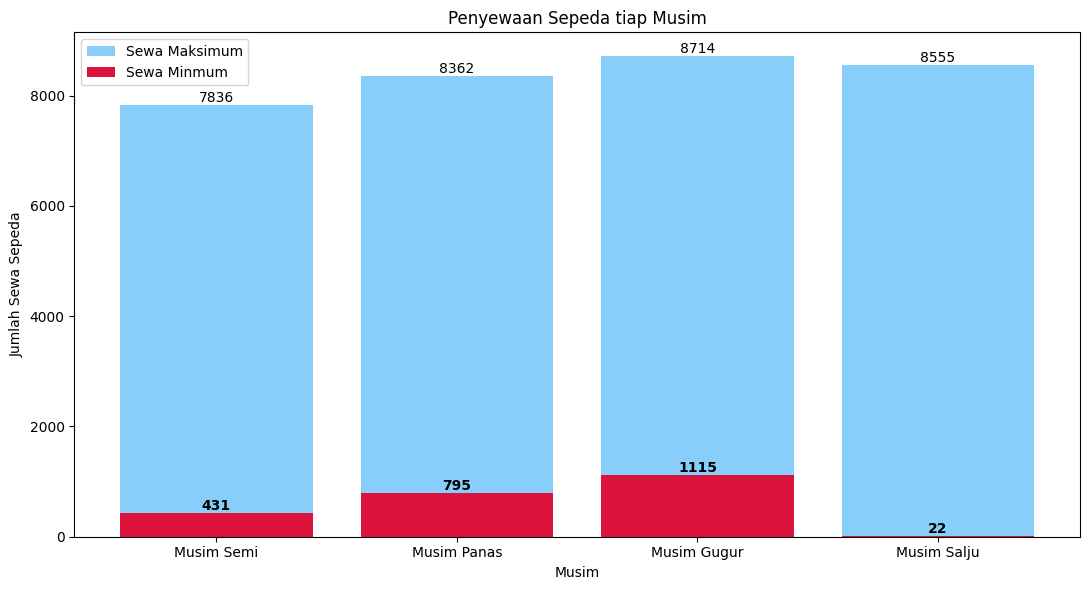

In [26]:
# Data day dan data hour berdasarkan musim
df_season = df_maindt.groupby("season_daily").agg({
    "instant_daily": "nunique",
    "cnt_daily": ["max", "min"]
})

# Plot data
plt.figure(figsize=(11, 6))
x = df_season.index
sewa_max = df_season[('cnt_daily', 'max')]
sewa_min = df_season[('cnt_daily', 'min')]

plt.bar(x, sewa_max, label='Sewa Maksimum', color='lightskyblue')
plt.bar(x, sewa_min, label='Sewa Minmum', color='crimson')

season_labels = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Salju']
plt.xticks(x, season_labels)

plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Penyewaan Sepeda tiap Musim')
plt.legend()

for i, (max, min) in enumerate(zip(sewa_max, sewa_min)):
    plt.text(i+1, max, str(max), ha='center', va='bottom')
    plt.text(i+1, min, str(min), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

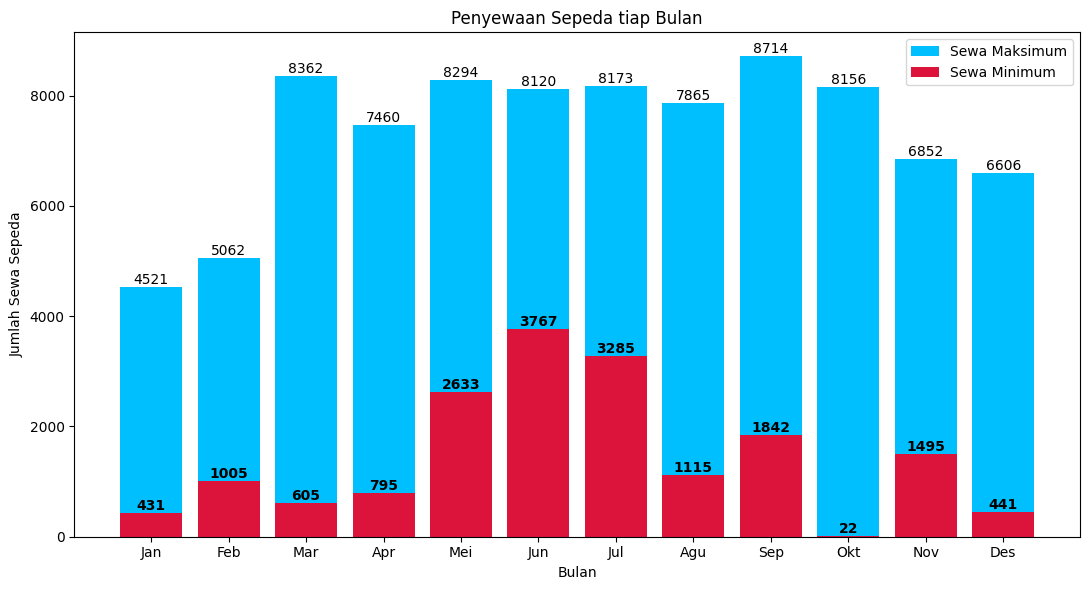

In [27]:
# Data dat dan data hour berdasarkan bulan
df_monthly = df_maindt.groupby("mnth_daily").agg({
    "instant_daily": "nunique",
    "cnt_daily": ["max", "min"]
})

# Plot the data
plt.figure(figsize=(11, 6))
x = df_monthly.index
sewa_max = df_monthly[('cnt_daily', 'max')]
sewa_min = df_monthly[('cnt_daily', 'min')]

plt.bar(x, sewa_max, label='Sewa Maksimum', color='deepskyblue')
plt.bar(x, sewa_min, label='Sewa Minimum', color='crimson')

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(x,month_labels)

plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Penyewaan Sepeda tiap Bulan')
plt.legend()

for i, (max, min) in enumerate(zip(sewa_max, sewa_min)):
    plt.text(i+1, max, str(max), ha='center', va='bottom')
    plt.text(i+1, min, str(min), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

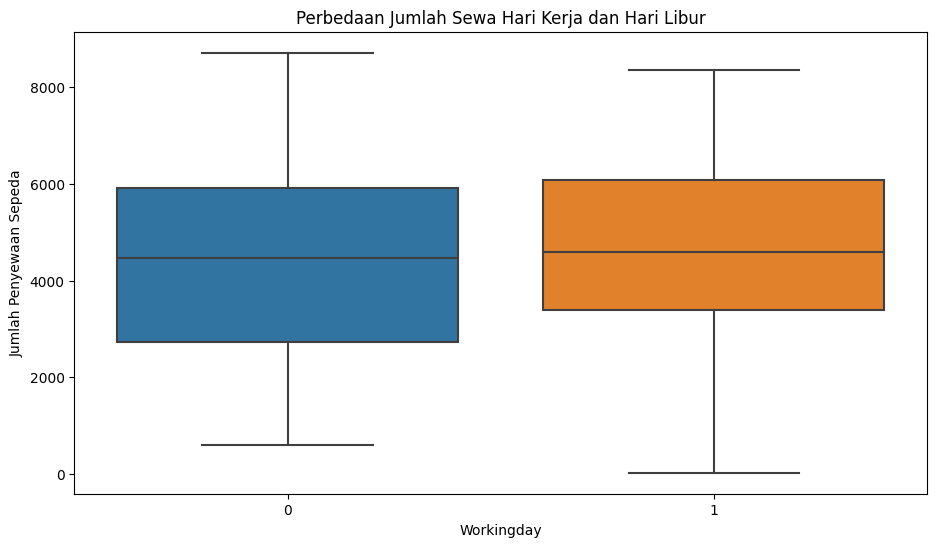

In [28]:
#Plot Penyewaan sepeda pada Hari kerja (1) dan hari libur (0)

plt.figure(figsize=(11, 6))
sns.boxplot(x="workingday_daily", y="cnt_daily", data=df_maindt)
plt.title("Perbedaan Jumlah Sewa Hari Kerja dan Hari Libur")
plt.xlabel("Workingday")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

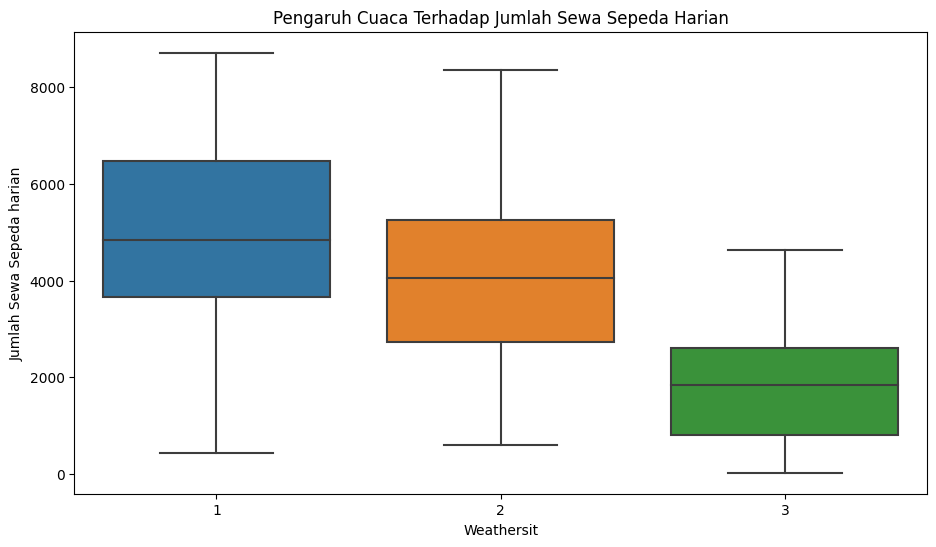

In [29]:
#Plot Penyewaan Sepeda berdasarkan Cuaca
plt.figure(figsize=(11, 6))
sns.boxplot(x="weathersit_daily", y="cnt_daily", data=df_maindt)
plt.title("Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda harian")
plt.show()

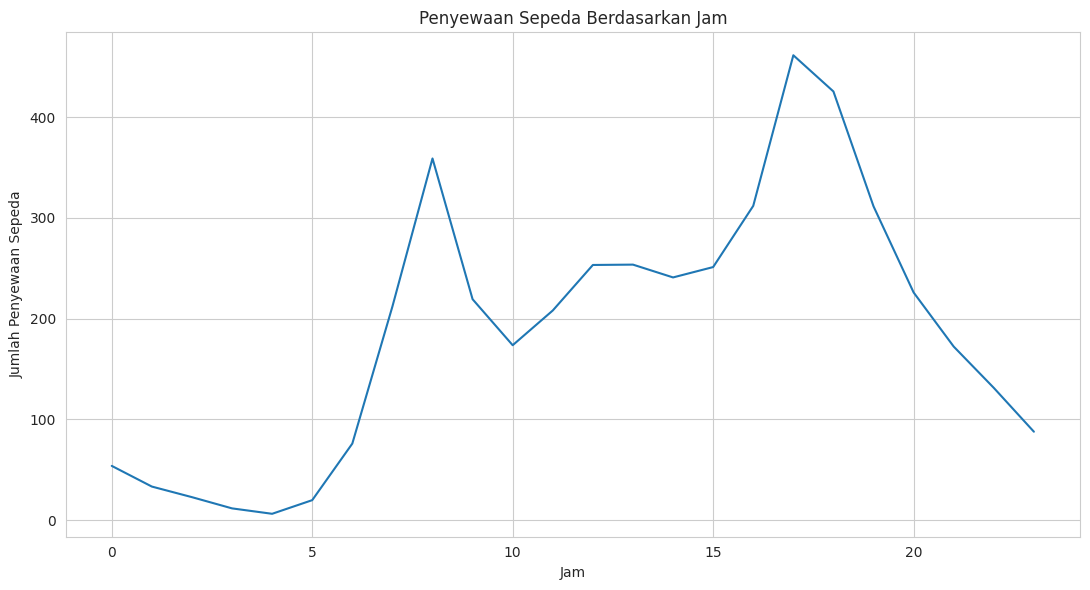

In [30]:
#Plot data penyewaan sepeda berdasarkan Jam
sns.set_style("whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=df_maindt, errorbar=None)

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Jam')

plt.tight_layout()
plt.show()

##Conclusion

1. Bagaimana tren penyewaan sepeda sepanjang tahun ?
2. Bagaimana pola penyewaan sepeda berdasarkan musim dan bulan agar dapat menyediakan sepeda secara efektif ?
3. Apakah ada pengaruh pola cuaca terhadap penyewaan sepeda ?
4. Apakah hari kerja dan hari libur berpengaruh terhadap penyewaan sepeda ?
5. Bagaimana pola penyewaan sepeda berdasarkan jam ?

#1. Bagaimana tren penyewaan sepeda sepanjang tahun ?


Berdasarkan analisis data yang telah dilakukan maka dapat disimpulkan bahwa tren penyewaan sepeda sepanjang tahun itu Fluktuatif yaitu terjadi naik turun. Dan terdapat penyewaan sepeda tertinggi yaitu pada bulan Oktober 2012

#2. Bagaimana pola penyewaan sepeda berdasarkan musim dan bulan agar dapat menyediakan sepeda secara efektif ?

Berdasarkan data yang telah dianalisis maka terjadi penyewaan sepeda tertinggi pada bulan September dengan maksimum yaitu 8714 dan minimum sekitar 1842. Sedangkan penyewaan sepeda tertinggi pada musim gugur dengan maksimum yaitu 8714 dan minimum sekitar 1115. Maka pada bulan September dan musim Gugur lebih menyediakan sepeda lebih banyak untuk disewakan.

#3. Apakah ada pengaruh pola cuaca terhadap penyewaan sepeda ?

Penyewaan sepeda meningkat ketika cuaca Cerah, berawan, berawan sebagian (1)

#4. Apakah hari kerja dan hari libur berpengaruh terhadap penyewaan sepeda ?

Berdasarkan analisis data terjadi peningkatan penyewaan sepeda ketika hari kerja maka dapat disimpulkan bahwa Hari kerja dan hari libur mempengaruhi penyewaan sepeda.

#5. Bagaimana pola penyewaan sepeda berdasarkan jam ?

Berdasarkan analisis data yang diperoleh, nilai tertinggi penyewaan sepeda terjadi sekitar pukul atau jam 18. Dan terjadi peningkatan drastis ketika jam 5 hingga jam 9